<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 7: Practical - Decision Tree and Ensembles <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani Bonab - Arman Malekzadeh
    
____

### Full Name : Erfan Sadraiye
### Student Number : 99101835
### Colab Link: https://colab.research.google.com/drive/18reULSF-_xEgD6VaWgCaLjFM-8iPFqOf?usp=sharing
___

**About the Dataset:**


Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

**Data Set Information:**


The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

To construct the data, seven geometric parameters of wheat kernels were measured:

- area A,
- perimeter P,
- compactness C = 4piA/P^2,
- length of kernel,
- width of kernel,
- asymmetry coefficient
- length of kernel groove.

The target column is "Type".

The data set can be used for the tasks of classification and cluster analysis.

https://archive.ics.uci.edu/ml/datasets/seeds

In [39]:
# you can use the following packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from random import choices
import math

## P1: Explore the Dataset

In [40]:
!wget -O dataset.csv https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1

--2023-06-04 20:22:17--  https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv [following]
--2023-06-04 20:22:17--  https://www.dropbox.com/s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7a30981acba9a84041bc9271e2.dl.dropboxusercontent.com/cd/0/get/B9XP8ntqBHVDfVRFteGSqIK7L4v03BdNOkwFZwIBypxVSCd6GFgvNcaptYHguDgQOVJXeAwld09OvsWtEHKXzsSfxfem_fcqTQFkf_PxPmYR_mfdQijr9Wlu5ZgkQxMmQH2NekZhmgd213EoymUXpvs4uT_WSYXy_pcvhoYTu0UiHI_7jKbQEjAcYenM8dK1tB0/file?dl=1# [following]
--2023-06-04 20:22:17--  https://uc7a30981acba9a84041bc9271e2.dl.dropboxusercontent.com/cd/0/get/B9XP8ntqBHVDfVRFteGSqIK7L4v03BdNOkwF

Load the dataset as a dataframe

In [41]:
df = pd.read_csv("dataset.csv")

Check if there are any missing values (and remove them) **(P1-1: 2 points)**

In [42]:
print(df.isnull().sum())
df.dropna(inplace=True)

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64


Plot the heatmap of the correlation matrix between features **(P1-2: 3 points)**

<Axes: >

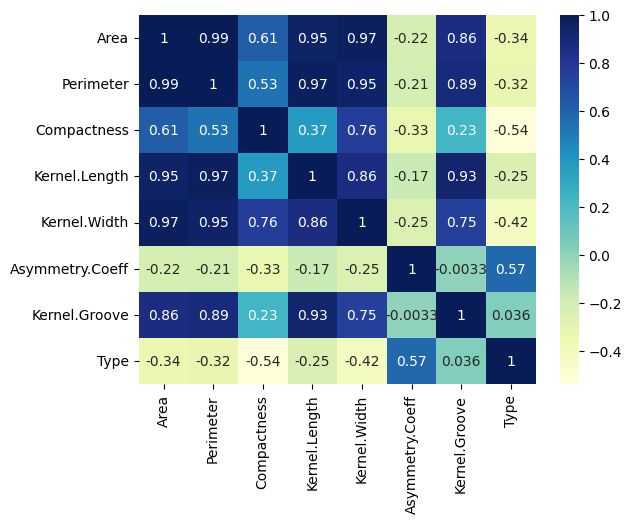

In [43]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Remove features which are highly correlated (> 95%) with the other ones **(P1-3: 5 points)**

In [44]:
x_df = df.drop('Type', axis=1)
correlation_matrix = x_df.corr().abs()
while True:
    correlation_matrix = x_df.corr().abs()
    for feature in correlation_matrix.columns:
        correlation_matrix[feature][feature] = pd.NA
    if correlation_matrix.max().max() < 0.95:
        break
    most_correlated_pair = correlation_matrix.max().idxmax()
    print(f'{most_correlated_pair} deleted!')
    x_df.drop(most_correlated_pair, axis=1, inplace=True)

final_columns = x_df.columns.tolist()
final_columns.append('Type')

non_correlated_df = df[final_columns]
non_correlated_df.head()

Area deleted!
Perimeter deleted!


,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.8710,5.763,3.312,2.221,5.220,1
1,0.8811,5.554,3.333,1.018,4.956,1
2,0.9050,5.291,3.337,2.699,4.825,1
3,0.8955,5.324,3.379,2.259,4.805,1
4,0.9034,5.658,3.562,1.355,5.175,1


Check for imbalance between classes **(P1-4: 3 points)**

<Axes: xlabel='Type', ylabel='count'>

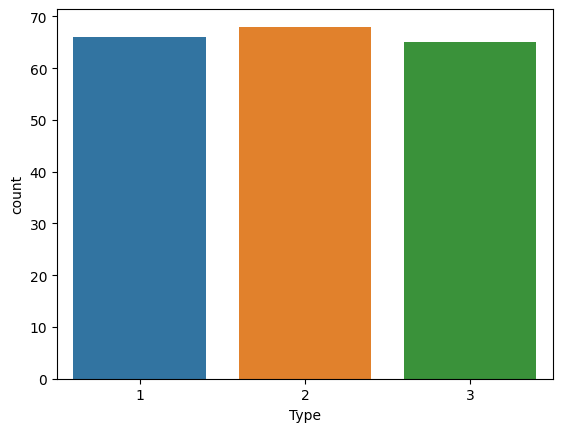

In [45]:
sns.countplot(x='Type', data=non_correlated_df)

## P2: Prepare the Training Data

Convert features and the target into numpy arrays **(P2-1: 2 points)**

In [46]:
x = non_correlated_df.drop('Type', axis=1).to_numpy()
y = non_correlated_df['Type'].to_numpy()

Split the samples into training (80%) and testing (20%) arrays **(P2-2: 5 points)**

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## P3: Decision Tree Implementation

Implement desicion tree for classification from scratch **(P3-1: 20 points)**

In [48]:
class DecisionTree:

    def __init__(self, criterion="entropy", max_depth=None):
        """
        Parameters:

        criterion -- “gini” for the Gini impurity and “entropy” for the Information Gain. (default “entropy”)
        max_depth -- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. (default=None)
        """
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, weights=None):
        """
        Build a decision tree classifier from the training set (X, y).

        Returns:
        self : Fitted estimator
        """
        if weights is None:
            weights = np.ones(X.shape[0]) / X.shape[0]
        self.tree = self.build_tree(np.concatenate([X, y.reshape(-1, 1)], axis=1), weights)
        return self

    def predict(self, X):
        """
        Predict class value for X.

        Returns:
        y : The predicted classes
        """
        y = []
        for sample in X:
            y.append(self.predict_sample(sample))
        return np.array(y)

    def predict_sample(self, sample):
        node = self.tree
        while True:
            if "value" in node:
                return node["value"]
            if sample[node["feature_index"]] <= node["threshold"]:
                node = node["left"]
            else:
                node = node["right"]

    def split_data(self, data, weights, feature_index, threshold):
        left = []
        right = []
        for i, sample in enumerate(data):
            if sample[feature_index] <= threshold:
                left.append(i)
            else:
                right.append(i)
        return data[left], data[right], weights[left], weights[right]

    def calculate_entropy(self, y, weights):
        entropy = 0
        sum_weights = np.sum(weights)
        classes = np.unique(y)
        for c in classes:
            weights_c = weights[y == c]
            p = np.sum(weights_c) / sum_weights
            entropy -= p * np.log2(p)
        return entropy

    def calculate_gini(self, y, weights):
        gini = 1
        sum_weights = np.sum(weights)
        classes = np.unique(y)
        for c in classes:
            weights_c = weights[y == c]
            p = np.sum(weights_c) / sum_weights
            gini -= p ** 2
        return gini

    def gini_impurity(self, parent, left, right, parent_weights, left_weights, right_weights):
        w_left = sum(left_weights) / sum(parent_weights)
        w_right = sum(right_weights) / sum(parent_weights)
        parent_gini = self.calculate_gini(parent, parent_weights)
        left_gini = self.calculate_gini(left, left_weights)
        right_gini = self.calculate_gini(right, right_weights)
        return parent_gini - (w_left * left_gini + w_right * right_gini)

    def information_gain(self, parent, left, right, parent_weights, left_weights, right_weights):
        w_left = sum(left_weights) / sum(parent_weights)
        w_right = sum(right_weights) / sum(parent_weights)
        parent_entropy = self.calculate_entropy(parent, parent_weights)
        left_entropy = self.calculate_entropy(left, left_weights)
        right_entropy = self.calculate_entropy(right, right_weights)
        return parent_entropy - (w_left * left_entropy + w_right * right_entropy)

    def calculate_criteria(self, parent, left, right, weights, left_weights, right_weights):
        y_parent = parent[:, -1]
        y_left = left[:, -1]
        y_right = right[:, -1]
        if self.criterion == "entropy":
            return self.information_gain(y_parent, y_left, y_right, weights, left_weights, right_weights)
        elif self.criterion == "gini":
            return self.gini_impurity(y_parent, y_left, y_right, weights, left_weights, right_weights)
        else:
            raise ValueError("Invalid criterion!")

    def leaf_value(self, y):
        unique_y = np.unique(y, return_counts=True)
        return {"value": unique_y[0][np.argmax(unique_y[1])]}

    def best_split(self, data, weights):
        num_features = data.shape[1] - 1
        best_split_result = {
            "criteria_value": -1,
        }
        for feature_index in range(num_features):
            x_feature = data[:, feature_index]
            thresholds = np.unique(x_feature)
            for threshold in thresholds:
                left, right, left_weight, right_weight = self.split_data(data,weights, feature_index, threshold)
                gain = self.calculate_criteria(data, left, right, weights, left_weight, right_weight)
                if gain > best_split_result["criteria_value"]:
                    best_split_result["criteria_value"] = gain
                    best_split_result["feature_index"] = feature_index
                    best_split_result["threshold"] = threshold
                    best_split_result["left"] = left
                    best_split_result["right"] = right
                    best_split_result["left_weight"] = left_weight
                    best_split_result["right_weight"] = right_weight
        return best_split_result

    def build_tree(self, data, weights, current_depth=0):
        if self.max_depth is None or current_depth <= self.max_depth:
            best_split = self.best_split(data, weights)
            if best_split["criteria_value"] > 0:
                left = self.build_tree(best_split["left"], best_split["left_weight"], current_depth + 1)
                right = self.build_tree(best_split["right"], best_split["right_weight"], current_depth + 1)
                best_split["left"] = left
                best_split["right"] = right
                return best_split
        return self.leaf_value(data[:, -1])


Define two decision trees with two different criteria **(P3-2: 3 points)**

In [49]:
entropy_tree = DecisionTree(criterion="entropy")
gini_tree = DecisionTree(criterion="gini")

Fit the defined decision trees on training samples **(P3-3: 2 points)**

In [50]:
entropy_tree.fit(x_train, y_train)
gini_tree.fit(x_train, y_train)

Get the results on the test set **(P3-4: 5 points)**

In [51]:
y_pred_entropy = entropy_tree.predict(x_test)
y_pred_gini = gini_tree.predict(x_test)
print("Accuracy of tree1:", sum(y_test == y_pred_entropy) / len(y_test))
print("Accuracy of tree2:", sum(y_test == y_pred_gini) / len(y_test))


Accuracy of tree1: 0.9
Accuracy of tree2: 0.9


Train the decision trees, considering the values [1,2,3,4,5] as the maximum depth **(P3-5: 5 points)**

In [52]:
print("Entropy:")
for max_depth in [1, 2, 3, 4, 5]:
    tree = DecisionTree(criterion="entropy", max_depth=max_depth)
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    print("Accuracy of tree with max_depth {}: {}".format(max_depth, sum(y_test == y_pred) / len(y_test)))
print("-------------------------------------")
print("Gini:")
for max_depth in [1, 2, 3, 4, 5]:
    tree = DecisionTree(criterion="gini", max_depth=max_depth)
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    print("Accuracy of tree with max_depth {}: {}".format(max_depth, sum(y_test == y_pred) / len(y_test)))

Entropy:
Accuracy of tree with max_depth 1: 0.9
Accuracy of tree with max_depth 2: 0.95
Accuracy of tree with max_depth 3: 0.975
Accuracy of tree with max_depth 4: 0.9
Accuracy of tree with max_depth 5: 0.9
-------------------------------------
Gini:
Accuracy of tree with max_depth 1: 0.9
Accuracy of tree with max_depth 2: 0.975
Accuracy of tree with max_depth 3: 0.975
Accuracy of tree with max_depth 4: 0.9
Accuracy of tree with max_depth 5: 0.9


Compare the accuracy score of the decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees. **(P3-6: 5 points)**

We can figure out when we limit depth of tree, it avoids overfitting and decrease test error. as we can see, tree with 3 max depth has best accuracy on validation data.

## P4: Ensemble Models

### P4-1: Bagging

Implement the bagging algorithm for classification from scratch **(P4-1-1: 15 points)**

In [53]:
class BaggingDecisionTree:

    def __init__(self, bootstraped_training_num=50, predictors_num=50):
        """
        Parameters:

        bootstraped_training_num -- The number of training sets we are gonna have
        predictors_num -- The number of predictors we want to use for each test sample
        """
        self.bootstraped_training_num = bootstraped_training_num
        self.predictors_num = predictors_num
        self.classifiers = []

    def fit(self, X, y):
        """
        Create `self.bootstraped_training_num` training sets by random sampling of the input training elements with replacement.
        Then create the same number of classifiers and fit each classifier on the corresponding training set.

        Paramters:
        X : training features array
        y : target array

        Returns:
        self : Fitted estimator
        """
        data = np.concatenate((X, y.reshape(-1,1)), axis=1)
        number_of_samples = X.shape[0]
        for i in range(self.bootstraped_training_num):
            random_indices = choices(range(number_of_samples), k=number_of_samples)
            bootstraped_set = data[random_indices, :]
            tree = DecisionTree()
            tree.fit(bootstraped_set[:, :-1], bootstraped_set[:, -1])
            self.classifiers.append(tree)
        return self

    def predict(self, X):
        """
        Predict class value for X using mavority voting of `self.predictors_num` classifiers.

        Paramters:
        X : training features array

        Returns:
        y : The predicted classes
        """
        number_of_samples = X.shape[0]
        y = np.zeros((number_of_samples, self.predictors_num), dtype=np.int64)
        for i in range(self.predictors_num):
            y_pred = self.classifiers[i].predict(X)
            y[:, i] = y_pred
        y_pred = np.array([np.argmax(np.bincount(y[i, :])) for i in range(number_of_samples)])
        return y_pred


Create an instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=50` and fit it on the training data **(P4-1-2: 3 points)**

In [54]:
bagging = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=50)
bagging.fit(x_train, y_train)

Create another instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=7` and fit it on the training data **(P4-1-3: 2 points)**

In [55]:
bagging2 = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=7)
bagging2.fit(x_train, y_train)

Test the created models on the test set. Discuss differences of two approaches we adopted. **(P4-1-4: 5 points)**

In [56]:
y_pred = bagging.predict(x_test)
y_pred2 = bagging2.predict(x_test)
print(f"Accuracy of bagging with {bagging.predictors_num} predictors:", sum(y_test == y_pred) / len(y_test))
print(f"Accuracy of bagging with {bagging2.predictors_num} predictors:", sum(y_test == y_pred2) / len(y_test))


Accuracy of bagging with 50 predictors: 0.85
Accuracy of bagging with 7 predictors: 0.925


### P4-2: Boosting

Implement the Adaboost algorithm for classification from scratch **(P4-2-1: 10 points)**

In [57]:
class AdaBoost:

    def __init__(self, weak_classifiers_count=50):
        """
        Parameters:
        weak_classifiers_count -- The number of weak classifiers we are gonna have
        """
        self.weak_classifiers_count = weak_classifiers_count
        self.classifiers = []
        self.alphas = []
        self.classes = []

    def fit(self, X, y):
        """
        Fit the Adaboost on training data. take DecisionTree with max_depth of 1 as your weak classifier.

        Paramters:
        X : training features array
        y : target array

        Returns:
        self : Fitted estimator

        """
        self.classes = np.unique(y)
        number_of_samples = X.shape[0]
        weights = np.ones(number_of_samples) / number_of_samples
        for i in range(self.weak_classifiers_count):
            tree = DecisionTree(max_depth=1)
            tree.fit(X, y, weights=weights)
            y_pred = tree.predict(X)
            wrong_predictions = y_pred != y
            true_predictions = y_pred == y
            error = np.sum(weights[wrong_predictions]) + 1e-10
            alpha = 0.5 * np.log((1 - error) / error)
            weights[wrong_predictions] = weights[wrong_predictions] * np.exp(alpha)
            weights[true_predictions] = weights[true_predictions] * np.exp(-alpha)
            weights = weights / np.sum(weights)
            self.classifiers.append(tree)
            self.alphas.append(alpha)
        return self

    def predict(self, X):
        """
        Predict class value for X using mavority voting of `self.predictors_num` classifiers.

        Paramters:
        X : training features array

        Returns:
        y : The predicted classes
        """
        number_of_samples = X.shape[0]
        number_of_classes = len(self.classes)
        classes = {}
        for i,c in enumerate(self.classes):
            classes[c] = i
        y = np.zeros((number_of_samples, number_of_classes), dtype=np.float64)
        for i in range(self.weak_classifiers_count):
            y_pred = self.classifiers[i].predict(X).astype(np.int64)
            for j in range(number_of_samples):
                y[j, classes[y_pred[j]]] += self.alphas[i]
        y_pred = np.array([self.classes[np.argmax(y[i, :])] for i in range(number_of_samples)])
        return y_pred

Create an instance of Adaboost and fit it to the data **(P4-2-2: 2 points)**

In [58]:
adaboost = AdaBoost()
adaboost.fit(x_train, y_train)

Test Adaboost on the testing set **(P4-2-3: 3 points)**

In [59]:
y_pred = adaboost.predict(x_test)
print("Accuracy of adaboost:", sum(y_test == y_pred) / len(y_test))

Accuracy of adaboost: 0.9
